In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
cfiles = ['moons_observations_clustering.npy', 'xor_observations_clustering.npy', 'double_cake_observations_clustering.npy', 
           'gaussian_observations_clustering.npy', 'swiss_roll_observations_clustering.npy', 'iris_observations_clustering.npy']

rfiles = ['moons_observations_random.npy', 'xor_observations_random.npy', 'double_cake_observations_random.npy', 
           'gaussian_observations_random.npy', 'swiss_roll_observations_random.npy', 'iris_observations_random.npy']

In [5]:
cdata = []
rdata = []

for cf in cfiles:
    cdata.append(np.load(cf, allow_pickle=True).item())

for rf in rfiles:
    rdata.append(np.load(rf, allow_pickle=True).item())

In [ ]:
/home/digvijay/Documents/developer/greedy_kernel_alignment/double_cake_observations_clustering_4.npy

In [24]:
rf = np.load('double_cake_observations_random.npy', allow_pickle= True).item()

In [6]:
cfiles = ['4', '8', '12']
cdata = []
for cf in cfiles:
    cdata.append(np.load(f"double_cake_observations_clustering_{cf}.npy", allow_pickle=True).item())

In [26]:
cdata.append(rf)

In [31]:
cdata_df = pd.DataFrame(cdata)
cdata_df['clusters'] = cfiles + ['random']

In [32]:
cdata_df

,classical_acc,init_svc_acc,init_kta,alignments,loss_per_epoch,executions,final_kta,train_acc,train_f1,train_cm,test_acc,test_f1,test_cm,clusters
0,[0.9333333333333333],[0.9333333333333333],[0.07296707933678685],"[[0.08866432994508834, 0.06390794821468879, 0....","[[11.257534207459225, 11.146295341112845, 11.1...",[2619750],[0.09231624837502724],[0.9111111111111111],[0.9111111111111111],"[[[22, 2], [2, 19]]]",[0.9333333333333333],[0.9320574162679426],"[[[5, 1], [0, 9]]]",4
1,[0.8666666666666667],[0.8],[0.11602259334524552],"[[0.1159978630359261, 0.11276886358778133, 0.1...","[[10.37660642454833, 10.270893713772802, 10.24...",[6133750],[0.13360216508419642],[0.9555555555555556],[0.9553333333333333],"[[[24, 0], [2, 19]]]",[0.8666666666666667],[0.8678571428571428],"[[[6, 0], [2, 7]]]",8
2,[0.8666666666666667],[0.8666666666666667],[0.12901839711690472],"[[0.12681655157840532, 0.1067233388903922, 0.0...","[[10.148377845581068, 10.051085331513164, 10.0...",[11655750],[0.10126463889165588],[0.9333333333333333],[0.9327300150829563],"[[[24, 0], [3, 18]]]",[0.8666666666666667],[0.8678571428571428],"[[[6, 0], [2, 7]]]",12
3,NaN,NaN,[0.010666648243763854],"[[0.011231231568076643, 0.011495197879847307, ...","[[-0.07917703033078399, -0.17981479100122316, ...",[22298500],[0.020801480967759578],[0.675],[0.661520737327189],"[[[54, 9], [30, 27]]]",[0.625],[0.623358348968105],"[[[13, 4], [11, 12]]]",random


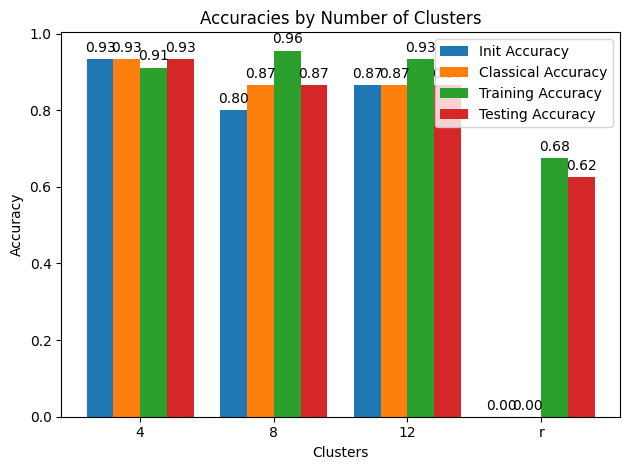

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation
data = {
    'classical_acc': [[0.9333333333333333], [0.8666666666666667], [0.8666666666666667], [0]],
    'init_svc_acc': [[0.9333333333333333], [0.8], [0.8666666666666667], [0]],
    'train_acc': [[0.9111111111111111], [0.9555555555555556], [0.9333333333333333], [0.675]],
    'test_acc': [[0.9333333333333333], [0.8666666666666667], [0.8666666666666667], [0.625]],
    'clusters': ['4', '8', '12', 'r']
}

df = pd.DataFrame(data)

# Extracting the first element from lists
for column in ['classical_acc', 'init_svc_acc', 'train_acc', 'test_acc']:
    df[column] = df[column].str[0]

# Define positions and width
N = len(df)
ind = np.arange(N)
width = 0.2

# Accuracy metrics and labels
accuracies = ['init_svc_acc', 'classical_acc', 'train_acc', 'test_acc']
accuracy_labels = ['Init Accuracy', 'Classical Accuracy', 'Training Accuracy', 'Testing Accuracy']
num_bars = len(accuracies)

# Calculate bar positions for grouped bars
bar_positions = [ind + (i - num_bars / 2 + 0.5) * width for i in range(num_bars)]

# Plotting
fig, ax = plt.subplots()

bars = []
for pos, acc, label in zip(bar_positions, accuracies, accuracy_labels):
    bar = ax.bar(pos, df[acc], width, label=label)
    bars.append(bar)

# Customize plot
ax.set_ylabel('Accuracy')
ax.set_xlabel('Clusters')
ax.set_title('Accuracies by Number of Clusters')
ax.set_xticks(ind)
ax.set_xticklabels(df['clusters'])
ax.legend()

# Function to add value labels
def add_value_labels(ax, bars):
    """Attach a text label above each bar displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels to each bar
for bar_group in bars:
    add_value_labels(ax, bar_group)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [34]:
loss_per_epoch_4 = cdata[0]['loss_per_epoch'][0]
loss_per_epoch_8 = cdata[1]['loss_per_epoch'][0]
loss_per_epoch_12 = cdata[2]['loss_per_epoch'][0]
loss_per_epoch_r = cdata[3]['loss_per_epoch'][0]

alignments_4 = cdata[0]['alignments'][0]
alignments_8 = cdata[1]['alignments'][0]
alignments_12 = cdata[2]['alignments'][0]
alignments_r = cdata[3]['alignments'][0]

In [38]:
len(alignments_4)

10

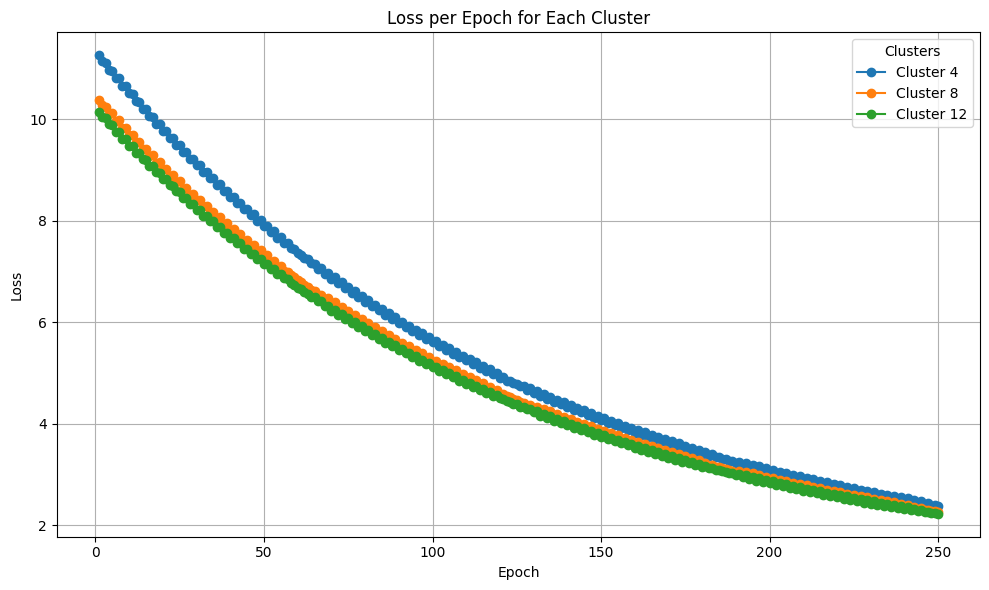

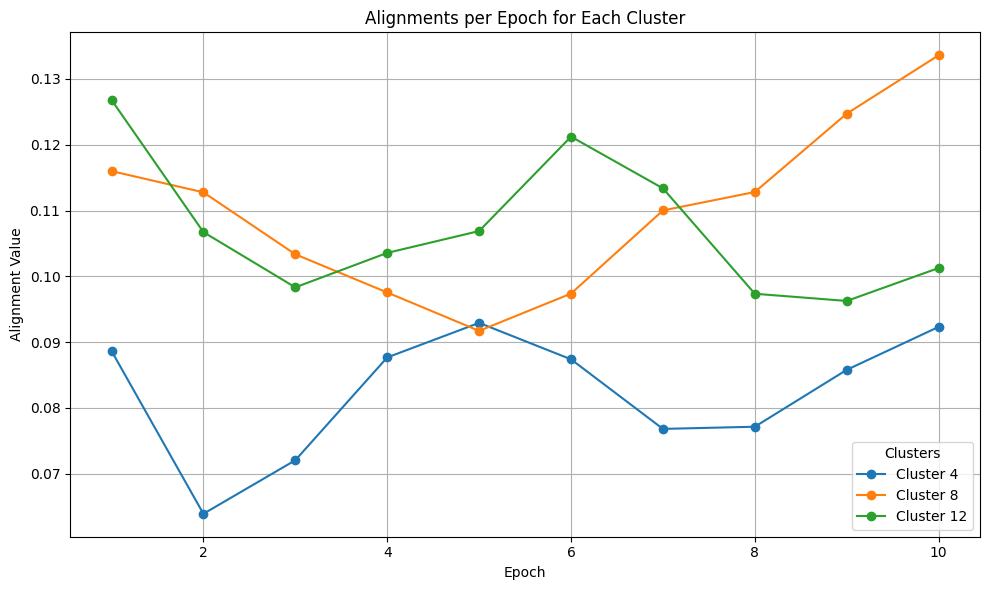

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
data = {
    'clusters': [4, 8, 12],
    'loss_per_epoch': [
        [loss_per_epoch_4],
        [loss_per_epoch_8],
        [loss_per_epoch_12],
    ],
    'alignments': [
        [alignments_4],
        [alignments_8],
        [alignments_12],
    ]
}

df = pd.DataFrame(data)

# Flatten the loss_per_epoch and alignments lists
df['loss_per_epoch'] = df['loss_per_epoch'].apply(lambda x: x[0])
df['alignments'] = df['alignments'].apply(lambda x: x[0])

# Plotting Loss per Epoch
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    epochs = np.arange(1, len(row['loss_per_epoch']) + 1)
    plt.plot(epochs, row['loss_per_epoch'], marker='o', label=f'Cluster {row["clusters"]}')

plt.title('Loss per Epoch for Each Cluster')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Alignments per Epoch
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    epochs = np.arange(1, len(row['alignments']) + 1)
    plt.plot(epochs, row['alignments'], marker='o', label=f'Cluster {row["clusters"]}')

plt.title('Alignments per Epoch for Each Cluster')
plt.xlabel('Epoch')
plt.ylabel('Alignment Value')
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()


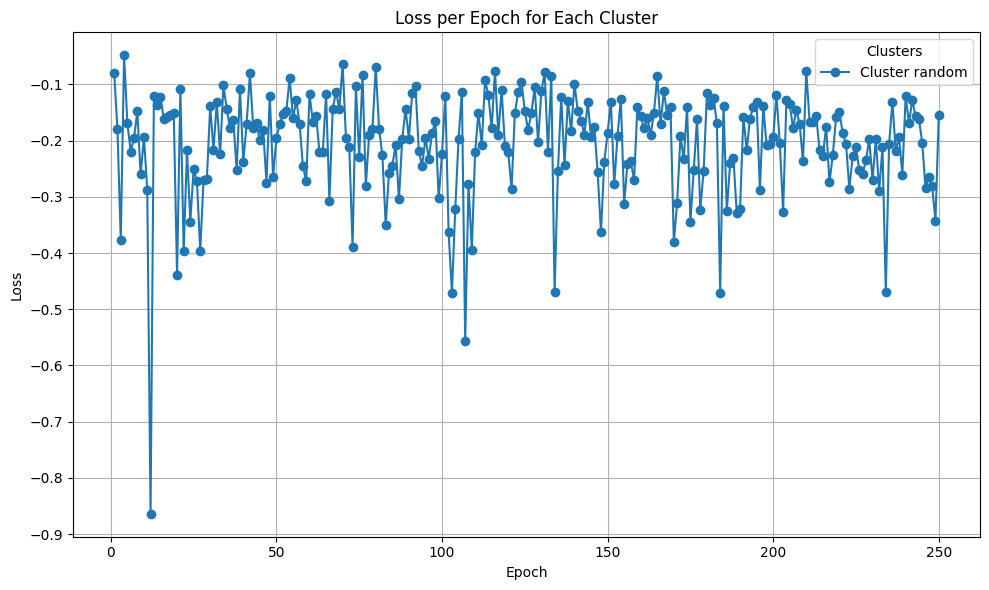

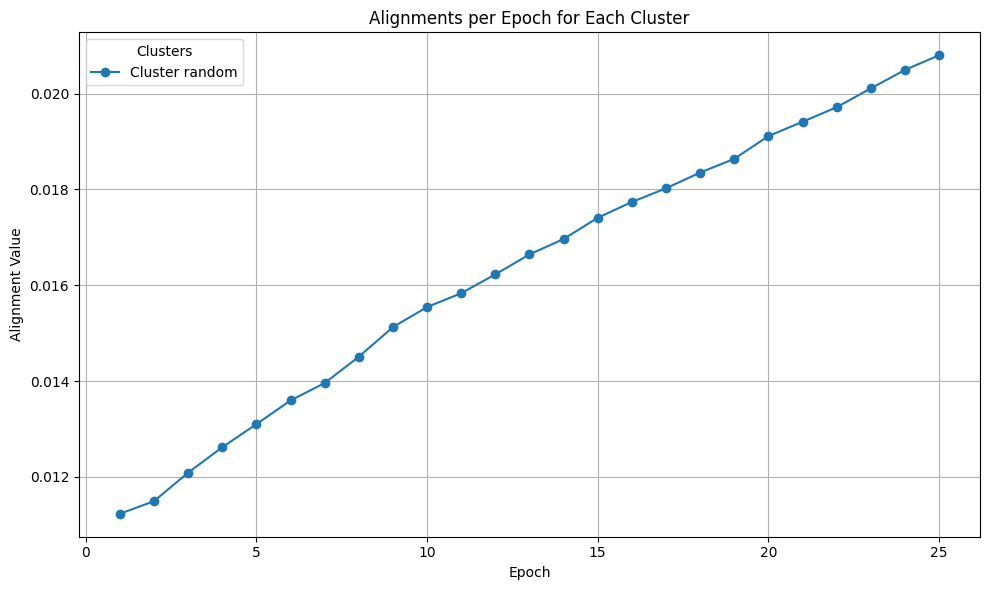

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
data = {
    'clusters': ['random'],
    'loss_per_epoch': [
        [loss_per_epoch_r],

    ],
    'alignments': [
        [alignments_r],
    ]
}

df = pd.DataFrame(data)

# Flatten the loss_per_epoch and alignments lists
df['loss_per_epoch'] = df['loss_per_epoch'].apply(lambda x: x[0])
df['alignments'] = df['alignments'].apply(lambda x: x[0])

# Plotting Loss per Epoch
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    epochs = np.arange(1, len(row['loss_per_epoch']) + 1)
    plt.plot(epochs, row['loss_per_epoch'], marker='o', label=f'Cluster {row["clusters"]}')

plt.title('Loss per Epoch for Each Cluster')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Alignments per Epoch
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    epochs = np.arange(1, len(row['alignments']) + 1)
    plt.plot(epochs, row['alignments'], marker='o', label=f'Cluster {row["clusters"]}')

plt.title('Alignments per Epoch for Each Cluster')
plt.xlabel('Epoch')
plt.ylabel('Alignment Value')
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
exec_4 = cdata[0]['executions'][0]
exec_8 = cdata[1]['executions'][0]
exec_12 = cdata[2]['executions'][0]
exec_r = cdata[3]['executions'][0]

In [23]:
rf = np.load('double_cake_observations_random.npy', allow_pickle= True).item()
rf['executions'][0]

tensor(22298500, requires_grad=True)

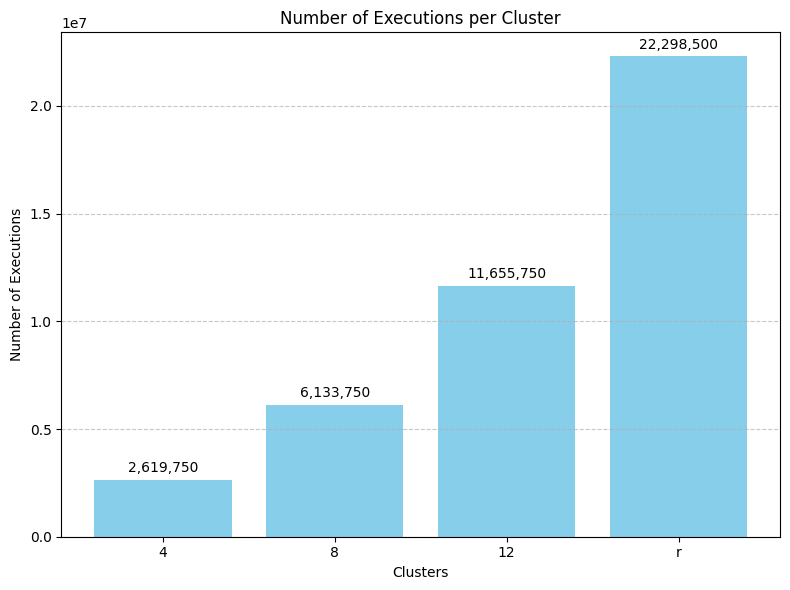

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
data = {
    'clusters': ['4', '8', '12', 'r'],
    'executions': [[exec_4], [exec_8], [exec_12], [exec_r]]
}

df = pd.DataFrame(data)

# Extract the number of executions from lists
df['executions'] = df['executions'].str[0]

# Plotting Executions per Cluster
plt.figure(figsize=(8, 6))

plt.bar(df['clusters'], df['executions'], color='skyblue')

plt.title('Number of Executions per Cluster')
plt.xlabel('Clusters')
plt.ylabel('Number of Executions')

# Format numbers with commas and add value labels on top of each bar
for idx, value in enumerate(df['executions']):
    plt.text(df['clusters'][idx], value + max(df['executions'])*0.01, f'{value:,}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()